<a href="https://colab.research.google.com/github/khimark/Enrollment/blob/main/Enrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/Enrollment.csv')

In [3]:
features = ['Gender','Age','GPA']
target_enrollment = 'Enrollment_Status'

In [4]:
# feature matrix (X) and target vector (y) for enrollment
X_enrollment = data[features]
y_enrollment = data[target_enrollment]


X_enrollment = pd.get_dummies(X_enrollment, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enrollment, y_enrollment, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Creating and training the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

    Enrolled       0.50      1.00      0.67         1
Not Enrolled       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



<ipython-input-6-bbd8d751ec08>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_binary = y_train.replace({'Enrolled': 1, 'Not Enrolled': 0})
<ipython-input-6-bbd8d751ec08>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_binary = y_test.replace({'Enrolled': 1, 'Not Enrolled': 0})


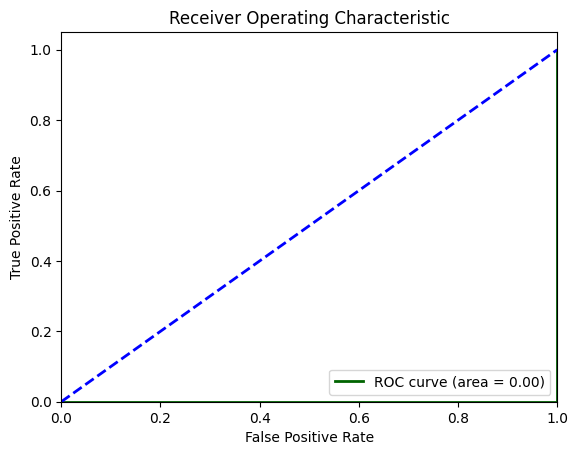

In [6]:
y_train_binary = y_train.replace({'Enrolled': 1, 'Not Enrolled': 0})
y_test_binary = y_test.replace({'Enrolled': 1, 'Not Enrolled': 0})


y_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Calculate roc_auc_score
roc_auc = roc_auc_score(y_test_binary, y_prob) # Calculate and assign roc_auc

# plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# New Section